<a href="https://colab.research.google.com/github/Blf100/Analise-de-dados-Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Netflix

O dataset utilizado nessa análise apresenta informações das 10 atrações mais assistidas por dia no serviço de streaming Netflix. Os dados são referentes aos EUA e são datados de 2020 a março de 2022

### Importando as Bibliotecas

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Importando os Dados

In [44]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/netflix daily top 10.csv')

### Primeiras Impressões Sobre os Dados

In [45]:
# Primeiras Linhas do Dataset
base.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [46]:
# Ultimas Linhas do Dataset
base.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [47]:
# Alterando Nome das Colunas
base.columns = ['A partir de', 'Classificacao', 'Classificacao do ano ate a data', 'Classificacao da ultima semana', 'Titulo', 'Tipo',
       'Exclusivo Netflix', 'Data de lancamento Netflix', 'Dias no Top 10',
       'Pontuacao de audiencia']

In [48]:
# Tamanho do Dataset
base.shape

(7100, 10)

In [49]:
# Informações Gerais Sobre o Dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   A partir de                      7100 non-null   object
 1   Classificacao                    7100 non-null   int64 
 2   Classificacao do ano ate a data  7100 non-null   object
 3   Classificacao da ultima semana   7100 non-null   object
 4   Titulo                           7100 non-null   object
 5   Tipo                             7100 non-null   object
 6   Exclusivo Netflix                4599 non-null   object
 7   Data de lancamento Netflix       7100 non-null   object
 8   Dias no Top 10                   7100 non-null   int64 
 9   Pontuacao de audiencia           7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [50]:
# Contando Valores Nulos
base.isnull().sum()

A partir de                           0
Classificacao                         0
Classificacao do ano ate a data       0
Classificacao da ultima semana        0
Titulo                                0
Tipo                                  0
Exclusivo Netflix                  2501
Data de lancamento Netflix            0
Dias no Top 10                        0
Pontuacao de audiencia                0
dtype: int64

#### Limpeza e tratamento dos dados

A coluna Exclusivo Netflix deveria apresentar informações categóricas como 'Yes', caso o títlulo seja exclusivo da Netflix, ou 'Not', caso contrário. Na pratica, os valores que deveriam ser 'Not' estão tidos como dados ausentes, então é necessário preencher esses valores faltantes com a categoria 'Not'.

In [51]:
# Etendendo os Valores Nulos da Coluna Netflix Exclusive
base['Exclusivo Netflix'].value_counts()

Yes    4599
Name: Exclusivo Netflix, dtype: int64

In [52]:
# Tratando Valores Ausentes
base['Exclusivo Netflix'].fillna('Not', inplace= True)

In [53]:
# Ecluindo colunas indesejadas
base.drop(columns=['A partir de', 'Classificacao do ano ate a data', 'Classificacao da ultima semana', 'Data de lancamento Netflix'], inplace=True)

### Estatísticas Descritivas

#### Resumo dos dados

In [54]:
base.describe()

,Classificacao,Dias no Top 10,Pontuacao de audiencia
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


#### Histograma da variável Pontuação de Audiência

O histograma do atributo Pontuacao de audiencia mostra que a maioria das observações estão situadas no começo da distribuição, ou seja, a grande maioria dos títulos tem pontuação de audiência menor que 100 (cem).

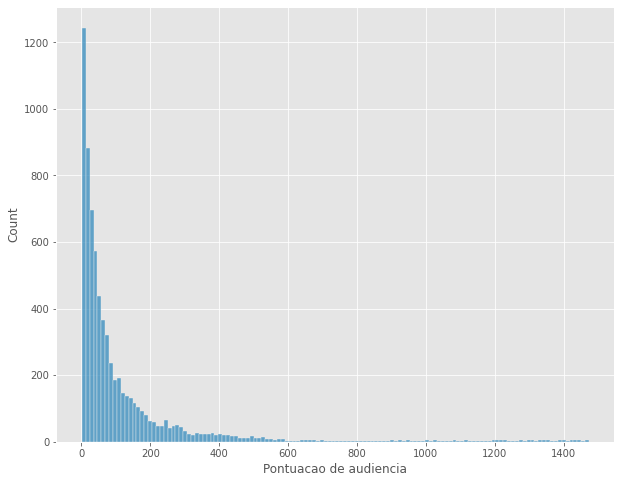

In [55]:
plt.figure(figsize=(10,8))
sns.histplot(base, x='Pontuacao de audiencia');

#### Boxplot da variável Pontuação de Audiência

Também é possível enchergar a distribuição das pontuações de audiência com o Boxplot. Indo de encontro o o histograma anterior, podemos observar que a maior parte das pontuações de audiência estão entre 50 e 128. Além disso, apesar do grande número de outliers, os dados estão pouco dispersos, dada a distância entre o terceiro e o primeiro quartil (tamanho da caixa).

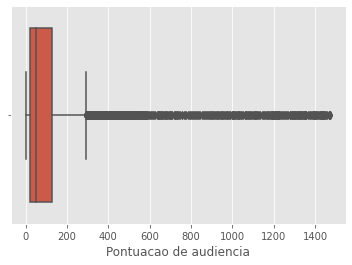

In [56]:
# Boxplot de Pontuação de Audiência
sns.boxplot(x=base['Pontuacao de audiencia']);

#### Quais títulos ficaram em média mais dias no top 10?

Text(0, 0.5, 'Média de Dias no Top 10')

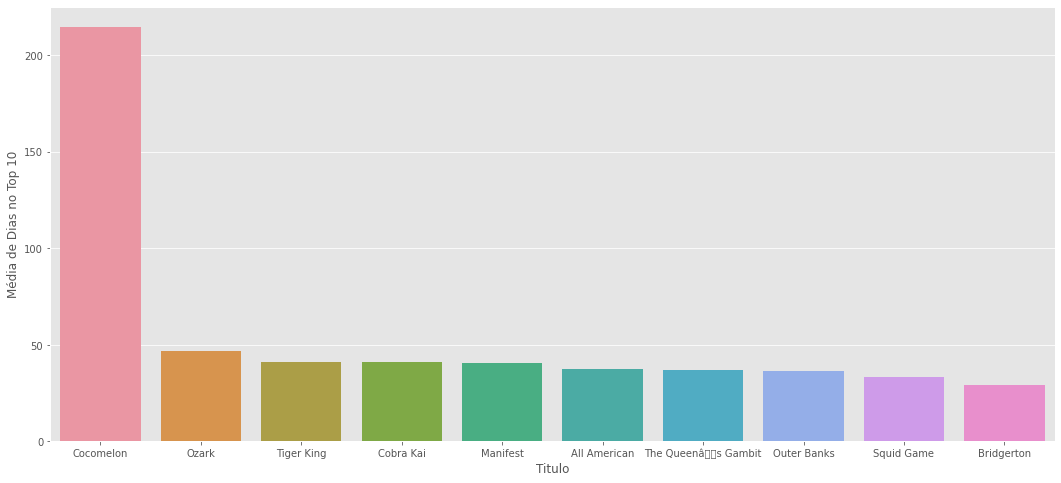

In [71]:
# Média de Dias no Top 10
media_dias_top10 = base.groupby('Titulo').agg(
                                              {'Dias no Top 10': np.mean}).sort_values(
                                              by='Dias no Top 10', ascending=False).iloc[0:10,].reset_index()

graf_barras_media_dias_top10= plt.figure(figsize=(18,8))
sns.barplot(x=media_dias_top10['Titulo'], y=media_dias_top10['Dias no Top 10'])
plt.ylabel('Média de Dias no Top 10')

#### Quais os tipos de atrações e qual tem maior ocorrência?

In [58]:
base['Tipo'].value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Tipo, dtype: int64

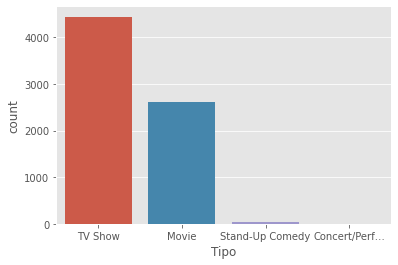

In [59]:
sns.countplot(base['Tipo']);

#### Qual a quantidade de atrações são exclusivos da Netflix?

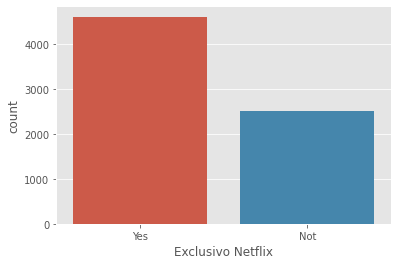

In [60]:
# Contando Quantos Títulos São exclusivos da Netflix
base['Exclusivo Netflix'].value_counts()

# Plotando exclusivos netflix
sns.countplot(base['Exclusivo Netflix']);

#### Os títulos exclusivos Netflix tem em média mais dias no top 10?

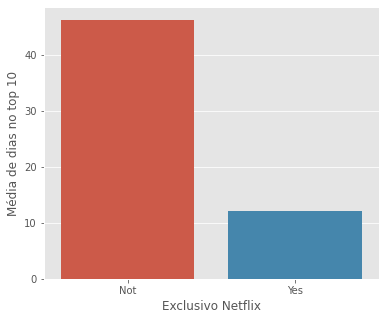

In [70]:
# Média de dias no top 10 que saõ exclusivos netflix
media_top10_exclusivo = base.groupby('Exclusivo Netflix').agg(
                                                              {'Dias no Top 10' : np.mean}).reset_index()
media_top10_exclusivo.columns = ['Exclusivo Netflix', 'Média de dias no top 10']

graf_barras_media_top10_exclusivo = plt.figure(figsize=(6,5))
sns.barplot(x=media_top10_exclusivo['Exclusivo Netflix'], y=media_top10_exclusivo['Média de dias no top 10']);

#### Quais as médias de audiência para títilos que são ou não exclusivos Netflix?

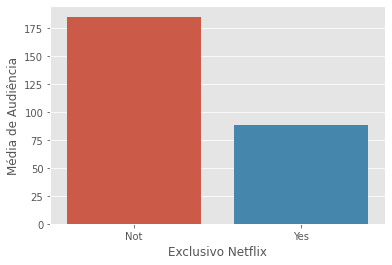

In [66]:
# Média de Audiência Para Títulos Exclusivos Netflix
audiencia_media_exclisivo = base.groupby('Exclusivo Netflix').agg({'Pontuacao de audiencia':np.mean}).reset_index()

# Plotando Média de Audiência Para Titulos Que são ou não exclusivos netFlix
sns.barplot(x=audiencia_media_exclisivo['Exclusivo Netflix'], y=audiencia_media_exclisivo['Pontuacao de audiencia'])
plt.ylabel('Média de Audiência')
plt.show()

#### Quais as médias de audiência para cada tipo de atração?

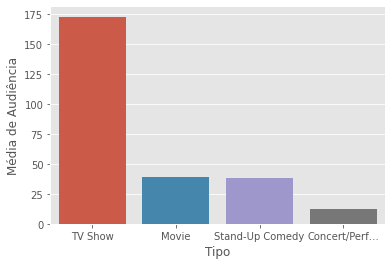

In [67]:
# Média de audiência por categoria de Atração
media_top10_categoria_atracao = base.groupby('Tipo').agg(
                                                        {'Pontuacao de audiencia':np.mean}).sort_values(
                                                        by='Pontuacao de audiencia', ascending=False).reset_index()

sns.barplot(x=media_top10_categoria_atracao['Tipo'], y=media_top10_categoria_atracao['Pontuacao de audiencia']);
plt.ylabel('Média de Audiência')
plt.show()                                                       

#### Quais o títulos ficaram mais dias em primeiro lugar?

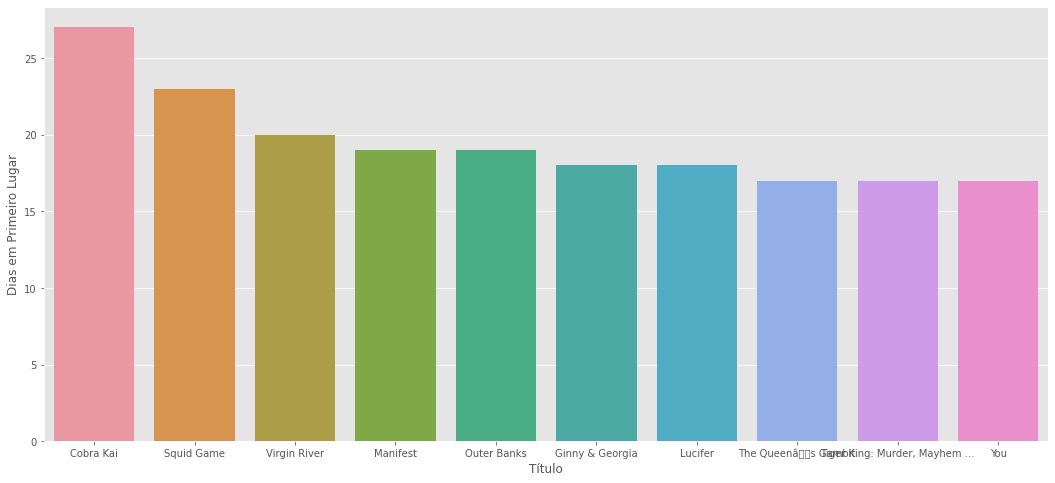

In [64]:
# Títulos Que mais ficaram em primeiro lugar
primeiros = base[base['Classificacao'] == 1]
top10_dias_em_primeiro = primeiros['Titulo'].value_counts()
top10_dias_em_primeiro = pd.DataFrame(top10_dias_em_primeiro).reset_index()
top10_dias_em_primeiro = top10_dias_em_primeiro.iloc[0:10,]
top10_dias_em_primeiro.columns = ['Título', 'Dias em Primeiro Lugar']

graf_barras_top10_dias_em_primeiro = plt.figure(figsize=(18,8))
sns.barplot(x=top10_dias_em_primeiro['Título'], y=top10_dias_em_primeiro['Dias em Primeiro Lugar']);